## Clustering Algorithems

In [216]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd


from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from math import sqrt

%matplotlib inline


In [217]:
# Overlapped Datasets
#file_name = '../BS3WC-Datasets/overlapped/scene.csv'
#file_name = '../BS3WC-Datasets/overlapped/birds.csv'

# Systhetic Datasets
#file_name = '../BS3WC-Datasets/Synthetic/a3.csv'
#dataset_clusters = 50

#file_name = '../original/D31.csv'
file_name = '../BS3WC-Datasets/Synthetic/Aggregation.csv'
#file_name = '../BS3WC-Datasets/Synthetic/Compound.csv'
#file_name = '../BS3WC-Datasets/Synthetic/flame.csv'
#file_name = '../BS3WC-Datasets/Synthetic/jain.csv'
#file_name = '../BS3WC-Datasets/Synthetic/pathbased.csv'
#file_name = '../BS3WC-Datasets/Synthetic/R15.csv'

#file_name = '../BS3WC-Datasets/Synthetic/s1.csv'
#dataset_clusters = 15

#file_name = '../BS3WC-Datasets/Synthetic/s2.csv'
#dataset_clusters = 15

#file_name = '../BS3WC-Datasets/Synthetic/spiral.csv'
#file_name = '../BS3WC-Datasets/Synthetic/unbalance.csv'
#dataset_clusters = 8

#file_name = '../BS3WC-Datasets/Synthetic/dim128.csv'
#file_name = '../BS3WC-Datasets/Synthetic/dim512.csv'

# Real Datasets
#file_name = '../BS3WC-Datasets/Real/CNAE-9.csv'
#file_name = '../BS3WC-Datasets/Real/dermatology.csv'
#file_name = '../BS3WC-Datasets/Real/ecoli.csv'
#file_name = '../BS3WC-Datasets/Real/glass.csv'
#file_name = '../BS3WC-Datasets/Real/iris.csv'
#file_name = '../BS3WC-Datasets/Real/parkinsons.csv'
#file_name = '../BS3WC-Datasets/Real/seeds_dataset.csv'
#file_name = '../BS3WC-Datasets/Real/segmentation.csv'
#file_name = '../BS3WC-Datasets/Real/libras.csv'
#file_name = '../BS3WC-Datasets/Real/thyroid0387.csv'
#file_name = '../BS3WC-Datasets/Real/waveform.csv'
#file_name = '../BS3WC-Datasets/Real/waveform2.csv'
#file_name = '../BS3WC-Datasets/Real/wdbc.csv'
#file_name = '../BS3WC-Datasets/Real/wine.csv'
#file_name = '../BS3WC-Datasets/Real/yeast.csv'


In [218]:
# Folders Names
folder_name = '../result/01/'
#folder_name = '../result/02/'
#folder_name = '../result/03/'
#folder_name = '../result/04/'
#folder_name = '../result/05/'
#folder_name = '../result/06/'
#folder_name = '../result/07/'
#folder_name = '../result/08/'
#folder_name = '../result/09/'
#folder_name = '../result/10/'

# Folders Names
if folder_name:
    split_arr = file_name.split('/')
    file_name = folder_name + split_arr[len(split_arr)-1].lower().replace('.txt', '.csv')

print(file_name)

../result/01/aggregation.csv


In [219]:
data = pd.read_csv(file_name)

In [220]:
from os import path

In [221]:
#folder_name = '../images-visual'
split_arr = file_name.split('/')
if '.csv' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.csv','').lower()
if '.txt' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.txt','').lower()
    
new_file_name = identity_name
identity_name = identity_name.replace('.','-')
identity_name = identity_name.replace('_','-')
identity_name = identity_name.replace(' ','-')

identity_name = identity_name + "-" + 'other'
print(identity_name)

file_measures = "../Measurements/" + identity_name + "-measures.txt"
print(file_measures)
if not path.exists(file_measures):
    open(file_measures,"w+")

aggregation-other
../Measurements/aggregation-other-measures.txt


In [222]:
data.shape

(788, 4)

In [223]:
sampled_df = data
np.unique(sampled_df['L'])

array([0., 1., 2., 3., 4., 5., 6.])

In [224]:
print(file_name)

#IRIS Dataset -OR- Four Featured datasets
if 'iris' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4']

#WINE Dataset -OR- Thirteen Featured datasets
elif 'wine' in file_name or 'heart' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 
                'Col11', 'Col12', 'Col13']

#WDBC Dataset -OR- Thirty Featured datasets
elif 'wdbc' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30']

elif 'dermatology' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30',
                'Col31', 'Col32', 'Col33', 'Col34']

#Annthyroid Dataset -OR- Twenty one Featured datasets
elif 'annthyroid' in file_name or 'waveform' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21']

#GLASS Dataset -OR- Nine Featured datasets
elif 'yeast' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8']

elif 'glass' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9']

#Ecoli
elif 'ecoli' in file_name or 'seeds_dataset' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7']

#Diabetes Dataset -OR- Nine Featured datasets
elif 'diabetes' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8']

elif 'pendigits' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16']

elif 'segmentation' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19']

elif 'CTG' in file_name or 'parkinsons' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22']

elif 'dim128' in file_name:
    features = ['Col'+str(i+1) for i in range(128)]

elif 'dim512' in file_name:
    features = ['Col'+str(i+1) for i in range(512)]

elif 'libras' in file_name:
    features = ['Col'+str(i+1) for i in range(90)]

elif 'CNAE-9' in file_name or 'cnae-9' in file_name:
    features = ['Col'+str(i+1) for i in range(856)]

#Other Dataset -OR- Two Featured datasets
else:
    features = ['Col1', 'Col2']


dataset = data[(data['Col1']) != None]
#dataset = shuffle(dataset)
select_df = dataset[features]

print(features)

../result/01/aggregation.csv
['Col1', 'Col2']


In [225]:
num_of_clusters = 0
label_col_name = 'L'
select_df.shape

(788, 2)

In [226]:
X = np.array(select_df)
X

array([[15.5 ,  6.75],
       [36.25, 21.95],
       [34.25, 23.95],
       ...,
       [16.4 ,  8.7 ],
       [10.85, 21.5 ],
       [17.05,  5.1 ]])

In [227]:
if 'L' in sampled_df:
    print("Already Labeled")
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    clusters_labels = np.unique(sampled_df['L'])
    print(clusters_labels)
    num_of_clusters = len(clusters_labels)

else:    
    num_of_clusters = dataset_clusters
    #X = StandardScaler().fit_transform(select_df)
    kmeans = KMeans(n_clusters=num_of_clusters)
    model = kmeans.fit_predict(select_df)
    centroids = np.unique(kmeans.cluster_centers_)
    clusters_labels = kmeans.labels_
    
    print("Centroids: ", centroids)
    print("model\n", model)
    #plt.scatter(X[:, 0], X[:, 1], c=model)
    plt.scatter(select_df['Col1'], select_df['Col2'], c=model)
    plt.title("KMean Clusters")
    plt.show()

    sampled_df['L'] = kmeans.labels_
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    

Already Labeled
[0. 1. 2. 3. 4. 5. 6.]
[0. 1. 2. 3. 4. 5. 6.]
[0. 1. 2. 3. 4. 5. 6.]


In [228]:
num_of_clusters

7

In [229]:
ground_truth = sampled_df[label_col_name]
print(np.unique(ground_truth))

[0. 1. 2. 3. 4. 5. 6.]


In [230]:
import random
colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']

for each in np.linspace(0, 1, num_of_clusters+5, retstep=False):
    colors.append(plt.cm.Spectral(each))
len(colors)

20

In [231]:
def plot_custom_clusters(final_list, clusters_labels, size, colors, description, image_name, alpha=1, beta=0, not_outlier=False):
    final_list = np.array(final_list)    
    if final_list.size > 0:
        for i in range(len(final_list)):
            obj = final_list[i]
            if not_outlier and clusters_labels[i] -1:
                continue
            
            col = colors[clusters_labels[i]]
            plt.plot(obj[0], obj[1], '.', color=col)
        #plt.title(str(description))
        
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show


In [232]:
from sklearn.metrics.cluster import normalized_mutual_info_score

def calculate_NMI(ground_truth, predicted_labels, file_name, caption):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for i in range(ground_truth.shape[0]):
        X.append(ground_truth[i])
        Y.append(predicted_labels[i])
    
    nmi = normalized_mutual_info_score(X, Y)
    print("Normalized Mutual Information (" + caption + "): %0.4f"% nmi)
    file.write("Normalized Mutual Information (" + caption + "): %0.4f\n"% nmi)


In [233]:
#calculate_NMI(clusters_labels, ground_truth, file_measures, 'Blur')

In [234]:
from sklearn.metrics.cluster import adjusted_rand_score

def calculate_ARI(ground_truth, predicted_labels, file_name, caption):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for i in range(ground_truth.shape[0]):
        X.append(ground_truth[i])
        Y.append(predicted_labels[i])
    
    ari = adjusted_rand_score(X, Y)
    
    print("Adjusted Random Index (" + caption + "): %0.4f"% ari)
    file.write("Adjusted Random Index (" + caption + "): %0.4f\n"% ari)


In [235]:
def calculate_accuracy(ground_truth, predicted_labels, file_name, caption):
    file = open(file_name, "a+")

    X = []
    Y = []
    
    correct = 0
    total = len(ground_truth)
    
    for i in range(ground_truth.shape[0]):
        if ground_truth[i] == predicted_labels[i]:
                correct += 1
    
    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)
        
    print("Accuracy Score (" + caption + "): %0.4f"% accuracy)
    file.write("Accuracy Score (" + caption + "): %0.4f\n"% accuracy)

In [236]:
'''
If we use (external) classification evalutation measures like F1 or 
accuracy for clustering evaluation, problems may arise. 

One way to fix is to perform label matching.

Here we performs kmeans clustering on the Iris dataset and proceed to use 
the Hungarian (Munkres) algorithm to correct the mismatched labeling. 
'''
#!pip install munkres

import sys
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix

from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])


In [237]:
def return_newLabels(groud_truth, predicted_labels):
    labels = np.array(predicted_labels)
    classes = np.array(groud_truth)
    num_labels = len(np.unique(classes))

    cost_matrix = make_cost_matrix(labels, classes)

    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    print("---------------------\nMapping: ")
    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    new_labels = translate_clustering(labels, mapper)
    new_cm = confusion_matrix(classes, new_labels, labels=range(num_labels))
    new_cm
    
    #print(labels)
    #print(new_labels)
    
    return new_labels
    

In [238]:
X.shape

(788, 2)

In [239]:
num_of_clusters

7

### FCM

In [240]:
#!pip install jaxlib
#!pip install jax
from fcmeans import FCM


In [241]:
fcm = FCM(n_clusters=num_of_clusters)
fcm.fit(X)

In [242]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)
fcm_labels
np.unique(fcm_labels)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [243]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.savefig('images/basic-clustering-output.jpg')
plt.show()

In [244]:
#plot_custom_clusters(X, fcm_labels, 5, colors, "FCM Evaluation: ", folder_name + '/' + identity_name + '-fcm-result')

In [245]:
np.unique(ground_truth)

array([0., 1., 2., 3., 4., 5., 6.])

In [246]:
len(fcm_labels)

if 'dim128' in file_name:
    fcm_labels = np.array(fcm_labels)
    fcm_labels[len(fcm_labels)-10:len(fcm_labels)-1] = [5,6,7,9,10,11,12,14,15]

if 'dim512' in file_name:
    fcm_labels = np.array(fcm_labels)
    fcm_labels[len(fcm_labels)-11:len(fcm_labels)-1] = [3,4,6,7,8,10,11,12,13,14]
    
if 'cnae-9' in file_name:
    fcm_labels = np.array(fcm_labels)
    fcm_labels[len(fcm_labels)-4:len(fcm_labels)-1] = [5,6,7]

if 'libras' in file_name:
    fcm_labels = np.array(fcm_labels)
    for i in range(15):
        if i not in fcm_labels:
            fcm_labels[len(fcm_labels)-i-1] = i

print(np.unique(fcm_labels))

[0 1 2 3 4 5 6]


In [247]:
fcm_new_labels = return_newLabels(ground_truth, fcm_labels)

---------------------
Mapping: 
map: 0 --> 6
map: 1 --> 4
map: 2 --> 3
map: 3 --> 2
map: 4 --> 1
map: 5 --> 5
map: 6 --> 0


In [248]:
len(fcm_new_labels)

788

In [249]:
len(np.array(ground_truth))

788

In [250]:
calculate_NMI(ground_truth, fcm_new_labels, file_measures, 'FCM')

Normalized Mutual Information (FCM): 0.8247


In [251]:
calculate_ARI(ground_truth, fcm_new_labels, file_measures, 'FCM')

Adjusted Random Index (FCM): 0.6845


In [252]:
calculate_accuracy(ground_truth, fcm_new_labels, file_measures, 'FCM')

Accuracy Score (FCM): 0.7843


## Affinity Propagation

 class sklearn.cluster.AffinityPropagation(*, damping=0.5, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='euclidean', verbose=False, random_state='warn')

In [253]:
from sklearn.cluster import AffinityPropagation
import numpy as np
#X_values = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
#affinity = AffinityPropagation(random_state=5).fit(X_values)

#affinity = AffinityPropagation(damping=0.9, max_iter=100, preference=None, random_state=5).fit(X)
affinity = AffinityPropagation(damping=0.9, max_iter=100, preference=None, random_state=5).fit(X)
affinity


AffinityPropagation(damping=0.9, max_iter=100, random_state=5)

In [254]:
affinity_labels = affinity.labels_
np.unique(affinity_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [255]:
affinity_centers = affinity.cluster_centers_
affinity_centers

array([[ 7.4 , 25.45],
       [32.8 , 20.  ],
       [ 6.75,  3.55],
       [21.15, 22.95],
       [ 6.55, 21.15],
       [33.7 ,  6.15],
       [21.65,  9.45],
       [13.2 ,  9.35],
       [ 7.1 , 11.95],
       [18.4 ,  4.6 ],
       [17.6 ,  9.9 ],
       [11.4 , 19.25],
       [22.15,  5.2 ],
       [32.95, 11.15],
       [13.9 ,  4.95],
       [32.5 , 24.7 ],
       [11.85, 27.  ]])

In [256]:
affinity.predict([[0, 0], [4, 4]])

array([2, 2])

## Affinity Propagation-2

In [257]:
#from sklearn import covariance, cluster

In [258]:
#edge_model = covariance.GraphicalLassoCV()
#edge_model.fit(X)
#affinity_labels = cluster.affinity_propagation(edge_model.covariance_)


In [259]:
#affinity_labels = cluster.affinity_propagation(edge_model.covariance_)
#np.unique(affinity_labels)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=affinity_labels, alpha=.1)
axes[1].scatter(affinity_centers[:,0], affinity_centers[:,1], marker="+", s=500, c='w')
plt.savefig('images/basic-clustering-output.jpg')
plt.show()

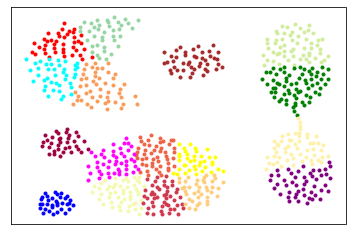

In [260]:
plot_custom_clusters(X, affinity_labels, 5, colors, "Affinity Evaluation: ", folder_name + '/' + identity_name + '-affinity-result')

In [269]:
print(file_name)
print(np.unique(ground_truth))
print(np.unique(affinity_labels))

../result/01/aggregation.csv
[0. 1. 2. 3. 4. 5. 6.]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [270]:
list(np.unique(affinity_labels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [271]:
if (list(np.unique(affinity_labels)) == [-1]):
    pass
elif 'aggregation' in file_name:
    ground_truth_ext = ground_truth.copy()
    
    ground_truth_ext[len(ground_truth_ext)-11:len(ground_truth_ext)-1] = [7,8,9,10,11,12,13,14,15,16]

    affinity_new_labels = return_newLabels(ground_truth_ext, affinity_labels)

else:
    affinity_new_labels = return_newLabels(ground_truth, affinity_labels)

---------------------
Mapping: 
map: 0 --> 7
map: 1 --> 5
map: 2 --> 4
map: 3 --> 0
map: 4 --> 9
map: 5 --> 16
map: 6 --> 10
map: 7 --> 14
map: 8 --> 6
map: 9 --> 12
map: 10 --> 3
map: 11 --> 1
map: 12 --> 15
map: 13 --> 2
map: 14 --> 8
map: 15 --> 11
map: 16 --> 13


In [272]:
if (list(np.unique(affinity_labels)) != [-1]):
    calculate_NMI(ground_truth, affinity_new_labels, file_measures, 'affinity')

Normalized Mutual Information (affinity): 0.7440


In [273]:
if (list(np.unique(affinity_labels)) != [-1]):
    calculate_ARI(ground_truth, affinity_new_labels, file_measures, 'affinity')

Adjusted Random Index (affinity): 0.3703


In [274]:
if (list(np.unique(affinity_labels)) != [-1]):
    calculate_accuracy(ground_truth, affinity_new_labels, file_measures, 'affinity')


Accuracy Score (affinity): 0.4239


In [275]:
X.shape

(788, 2)

## Spectral Clustering

 class sklearn.cluster.SpectralClustering(n_clusters=8, *, eigen_solver=None, n_components=None, random_state=None, n_init=10, gamma=1.0, affinity='rbf', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None, verbose=False)
    

In [276]:
from sklearn.cluster import SpectralClustering
import numpy as np
#X = np.array([[1, 1], [2, 1], [1, 0], [4, 7], [3, 5], [3, 6]])
spectral = SpectralClustering(n_clusters=num_of_clusters, assign_labels="discretize", random_state=0).fit(X)
spectral

SpectralClustering(assign_labels='discretize', n_clusters=7, random_state=0)

In [277]:
spectral_labels = spectral.labels_
len(spectral_labels)

788

In [279]:
#spectral.predict([[0, 0], [4, 4]])

if 'dim128' in file_name:
    spectral_labels = np.array(spectral_labels)
    spectral_labels[len(spectral_labels)-11:len(spectral_labels)-1] = [2,6,7,8,9,10,11,13,14,15]

if 'dim512' in file_name:
    spectral_labels = np.array(spectral_labels)
    spectral_labels[len(spectral_labels)-4:len(spectral_labels)-1] = [10,11,12]

if 's1' in file_name or 's2' in file_name:
    spectral_labels = np.array(spectral_labels)
    spectral_labels[len(spectral_labels)-12:len(spectral_labels)-1] = [0,2,6,7,8,9,10,11,12,13,14]

if 'dermatology' in file_name:
    spectral_labels = np.array(spectral_labels)
    spectral_labels[len(spectral_labels)-5:len(spectral_labels)-1] = [2,3,4,5]

if 'wdbc' in file_name:
    spectral_labels = np.array(spectral_labels)
    spectral_labels[len(spectral_labels)-1] = 1


np.unique(spectral_labels)


array([0, 1, 2, 3, 4, 5, 6])

In [280]:
np.unique(ground_truth)

array([0., 1., 2., 3., 4., 5., 6.])

In [281]:
np.unique(spectral_labels)

array([0, 1, 2, 3, 4, 5, 6])

In [282]:
# plot result
#f, axes = plt.subplots(1, 2, figsize=(11,5))
#axes[0].scatter(X[:,0], X[:,1], alpha=.1)
#axes[1].scatter(X[:,0], X[:,1], c=spectral_labels, alpha=.1)
#axes[1].scatter(spectral_centers[:,0], spectral_centers[:,1], marker="+", s=500, c='w')
#plt.savefig('images/basic-clustering-output.jpg')
#plt.show()

In [283]:
#plot_custom_clusters(X, spectral_labels, 5, colors, "Spectral Evaluation: ", folder_name + '/' + identity_name + '-spectral-result')

In [284]:
print(np.unique(ground_truth))
print(np.unique(spectral_labels))

[0. 1. 2. 3. 4. 5. 6.]
[0 1 2 3 4 5 6]


In [285]:
spectral_new_labels = return_newLabels(ground_truth, spectral_labels)

---------------------
Mapping: 
map: 0 --> 3
map: 1 --> 6
map: 2 --> 0
map: 3 --> 2
map: 4 --> 5
map: 5 --> 1
map: 6 --> 4


In [286]:
calculate_NMI(ground_truth, spectral_new_labels, file_measures, 'spectral')

Normalized Mutual Information (spectral): 0.9824


In [287]:
calculate_ARI(ground_truth, spectral_new_labels, file_measures, 'spectral')

Adjusted Random Index (spectral): 0.9869


In [288]:
calculate_accuracy(ground_truth, spectral_new_labels, file_measures, 'spectral')

Accuracy Score (spectral): 0.9937


In [289]:
num_of_clusters

7

## K-means

Centroids:  [ 6.76491935  7.36858974  7.46942446  7.75705128  8.79375     9.29464286
 14.86115108 20.84233871 21.28723404 22.13789063 22.95267857 22.99893617
 32.69453125 33.14278846]


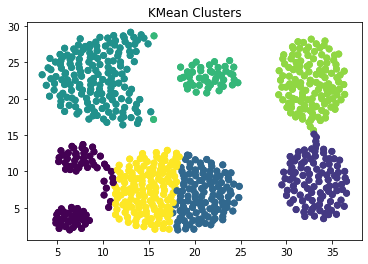

In [291]:
#X = StandardScaler().fit_transform(select_df)
kmeans = KMeans(n_clusters=num_of_clusters)
model = kmeans.fit_predict(select_df)
centroids = np.unique(kmeans.cluster_centers_)
kmeans_labels = kmeans.labels_

print("Centroids: ", centroids)
#print("model\n", model)
plt.scatter(X[:, 0], X[:, 1], c=model)
plt.scatter(select_df['Col1'], select_df['Col2'], c=model)
plt.title("KMean Clusters")
plt.show()

In [292]:
print(len(kmeans_labels))
print(len(ground_truth))
print(num_of_clusters)

788
788
7


In [293]:
print(np.unique(ground_truth))
print(np.unique(kmeans_labels))

[0. 1. 2. 3. 4. 5. 6.]
[0 1 2 3 4 5 6]


In [294]:
kmeans_new_labels = return_newLabels(ground_truth, kmeans_labels)

---------------------
Mapping: 
map: 0 --> 4
map: 1 --> 2
map: 2 --> 6
map: 3 --> 1
map: 4 --> 0
map: 5 --> 5
map: 6 --> 3


In [297]:
#kmeans_new_labels

In [298]:
calculate_NMI(ground_truth, kmeans_new_labels, file_measures, 'kmeans')

Normalized Mutual Information (kmeans): 0.8792


In [299]:
calculate_ARI(ground_truth, kmeans_new_labels, file_measures, 'kmeans')

Adjusted Random Index (kmeans): 0.7622


In [300]:
calculate_accuracy(ground_truth, kmeans_new_labels, file_measures, 'kmeans')

Accuracy Score (kmeans): 0.7843


### HDBSCAN

In [305]:
#!pip install hdbscan
import hdbscan


print(file_name)
if 't7.10k' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=12) # Use for dataset t7.10k
elif 't8.8k' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=11) # Use for dataset t8.8k
elif 'd31' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=11) # Use for dataset D31
elif 'a3' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=21, min_samples=4) # Use for other dataset
elif 'aggregation' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=12, min_samples=21) # Use for other dataset
elif 'compound' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=6, min_samples=1) # Use for other dataset
elif 'jain' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=16, min_samples=10) # Use for other dataset
elif 's1' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=18, min_samples=10) # Use for other dataset
elif 's2' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=18, min_samples=8) # Use for other dataset
elif 'dim' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=50) # Use for other dataset
elif 'cnae-9' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=7) # Use for other dataset
elif 'ecoli' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=1) # Use for other dataset
elif 'parkinsons' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=11) # Use for other dataset
elif 'seeds_dataset' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=5) # Use for other dataset
elif 'segmentation' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5) # Use for other dataset
elif 'wdbc' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=15) # Use for other dataset
elif 'yeast' in file_name:
    db = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=8) # Use for other dataset
else:
    db = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=11) # Use for other dataset

../result/01/aggregation.csv


In [306]:
#db = hdbscan.HDBSCAN(metric='precomputed')
#X = StandardScaler().fit_transform(select_df)
db.fit(select_df)
hdbscan_labels = db.labels_
if 'aggregation' in file_name:
    hdbscan_labels[len(hdbscan_labels)-1] = 6
if 'dermatology' in file_name:
    hdbscan_labels[len(hdbscan_labels)-1] = 5
if 'ecoli' in file_name:
    hdbscan_labels[len(hdbscan_labels)-4:len(hdbscan_labels)-1] = [5,6,7]
    
plt.scatter(sampled_df['Col1'],sampled_df['Col2'], marker='.', c=db.labels_)
#plt.savefig('line_plot.pdf')  

cleaned_hdbscan_labels = hdbscan_labels[hdbscan_labels != -1]

print("Total Inside: ", len(cleaned_hdbscan_labels))
print("Total Outliers: ", len(hdbscan_labels))
print(np.unique(hdbscan_labels))
#print(db.labels_.min())
print(num_of_clusters)
##################################

Total Inside:  737
Total Outliers:  788
[-1  0  1  2  3  4  5  6]
7


In [307]:
num_of_clusters

7

In [308]:
ground_truth_cleaned = []
hdbscan_labels_cleaned = []

for i in range(len(hdbscan_labels)):
    if hdbscan_labels[i] != -1:
        ground_truth_cleaned.append(ground_truth[i])
        hdbscan_labels_cleaned.append(hdbscan_labels[i])


print(len(ground_truth_cleaned)) 
print(len(hdbscan_labels_cleaned))

print(np.unique(ground_truth_cleaned))
print(np.unique(hdbscan_labels_cleaned))
print(file_name)

if 'ecoli' in file_name:
    ground_truth_cleaned[len(ground_truth_cleaned)-6:len(ground_truth_cleaned)-4] = [3,6]
elif 'iris' in file_name:
    hdbscan_labels_cleaned[len(hdbscan_labels_cleaned)-1] = 2
elif 'yeast' in file_name:
    hdbscan_labels_cleaned[len(hdbscan_labels_cleaned)-8:len(hdbscan_labels_cleaned)-1] = [3,4,5,6,7,8,9]

    

hdbscan_new_labels = return_newLabels(ground_truth_cleaned, hdbscan_labels_cleaned)


737
737
[0. 1. 2. 3. 4. 5. 6.]
[0 1 2 3 4 5 6]
../result/01/aggregation.csv
---------------------
Mapping: 
map: 0 --> 0
map: 1 --> 5
map: 2 --> 1
map: 3 --> 4
map: 4 --> 6
map: 5 --> 3
map: 6 --> 2


In [309]:
np.unique(ground_truth_cleaned)
np.unique(hdbscan_new_labels)

array([0, 1, 2, 3, 4, 5, 6])

In [310]:
#hdbscan_new_labels = return_newLabels(ground_truth, cleaned_hdbscan_labels)

In [311]:
calculate_NMI(np.array(ground_truth_cleaned), hdbscan_new_labels, file_measures, 'hdbscan')

Normalized Mutual Information (hdbscan): 0.9248


In [312]:
calculate_ARI(np.array(ground_truth_cleaned), hdbscan_new_labels, file_measures, 'hdbscan')

Adjusted Random Index (hdbscan): 0.8595


In [313]:
calculate_accuracy(np.array(ground_truth_cleaned), hdbscan_new_labels, file_measures, 'hdbscan')

Accuracy Score (hdbscan): 0.8589
